### Problem 1

The Birthday Problem: This is a classic problem that has a nonintuitive answer. Suppose there are 𝑁 students in a room.

#### Part a)

We wish to figure out the probability that at least two of them have the same birthday (month and day)?  (Assume that each day is equally likely to be a student's birthday, that there are no sets of twins, and that there are 365 days in the year. Do not include leap years).

"At least two" with the same birthday could mean that exactly two students have the same birthday and all other students have birthdays different from each other and different from that one shared birthday. It could mean that two students share one birthday and two students share a different birthday and all other students have birthdays different from each other and different from either of those shared birthdays. It could mean that three students share one birthday and two students share a different birthday and all other students... this is getting difficult!

When we need to compute the probability of an event describes as "at least" (for example "at least one" or "at least two"), it is almost always easier to consider the complement of the event. Indeed, we have that

$$P(\text{at least two share a birthday}) = 1-P(\text{none share a birthday})$$

Before solving this problem analytically, let's try to approach this via simulation using R! In the next cell, we will set $N$ to be 10 and sample birthdays for $N$ people. For simulation, considering the complement of the event will not be particularly advantageous so we will just approach the problem directly. Run the next cell to simulate 10 birthdays.

In [3]:
# Run this cell
N = 10
birthdays = sample(1:365, size=N, replace = TRUE)
birthdays

[1] 157 124  61 163  48 192  26 360 118 278

Are there any shared birthdays here? Typing `unique(birthdays)` will list all of the unique elements of the vector birthdays. If the length of this vector is shorter than the length of the original vector, we know that there is at least one duplicate.

In [4]:
# Run this cell
share = FALSE
if(length(unique(birthdays)) < length(birthdays)) 
{
  share = TRUE
}
share

[1] FALSE

To see probability "in action", we will repeat our experiment many times!

In [5]:
# Number of repetitions of our simulated experiment
numreps = 100000

# Inititalize a Boolean vector with all FALSE values
share = rep(FALSE,numreps)

# Start the simulation
for(i in 1:numreps)
{
   birthdays = sample(1:365, size=N, replace = TRUE)
   if(length(unique(birthdays)) < length(birthdays)) 
   {
      share[i] = TRUE
   }
}


# When R sums a vector of booleans (TRUE or FALSE) it is treating TRUE as 1 and FALSE as 0.
# So, `sum(share)` will give the total number of "TRUE"s

sum(share)/numreps  #proportion of runs that have duplicate birthdays

[1] 0.11727

Run the cell above several times. Do you see a lot of variability in the answer? If you roll a fair six-sided die 5 times, do you really think that you will see a 3 $1/6$ of the time? To get a good estimate of that $1/6$ probability, you need to roll the die a lot! 

Increase "numreps" to 100,000 and run it several times again. (Note: R is very slow at "looping" so each run may take a moment. There are more efficient ways to code the simulation in R but we are using the loop as, arguably, the most straightforward method for clarity.)

With each run at the higher number of reps, your estimate should be more consistent.

<hr>
We now challenge you to work out the probability 

$$P(\text{at least two share a birthday}) = 1-P(\text{none share a birthday})$$

on paper for a general $N$. If you need to look up the solution in a book or on the internet, make sure you read it carefully until you understand it. Although this is an "ungraded lab", skipping this challenge can hurt you as this course progresses!

In the next cell, use R to work out the value of your analytical solution in the case that $N=10$. Does it match (approximately) the answer you arrived at via simulation?

In [6]:
# Your code here
# no repetition
calc.birthday.prob = function(n) {
    V.nr = prod(365:(365 - n + 1))
    # total possible selections
    V.total = 365^n
    P.none.share = V.nr / V.total * 100
    P.2.share = 100 - P.none.share
    return(P.2.share)
}
calc.birthday.prob(N)

[1] 11.69482

#### Part b)

Copy your code form the previous cell into the next cell. Alter it to determine, through trial-and-error, how  large $N$ must be so that the probability that at least two of them have the same birthday is at least 1/2? Answer this through trial and error by using R to evaluate your analytical solution for various values of $N$. 

(Make sure you can get the given answer!)

In [7]:
# Your code here: The answer is 23 !!!
n = N
P.2.share = calc.birthday.prob(N)
while(P.2.share < 50) {
    n = n + 1
    P.2.share = calc.birthday.prob(n)
}
n

[1] 23

#### Part c)

For $N=1,2,\ldots, 40$, we want to plot $N$ (the number of students) on the $x$-axis versus the probability that at least two of them have the same birthday
on the $y$-axis. Fill in the missing code.

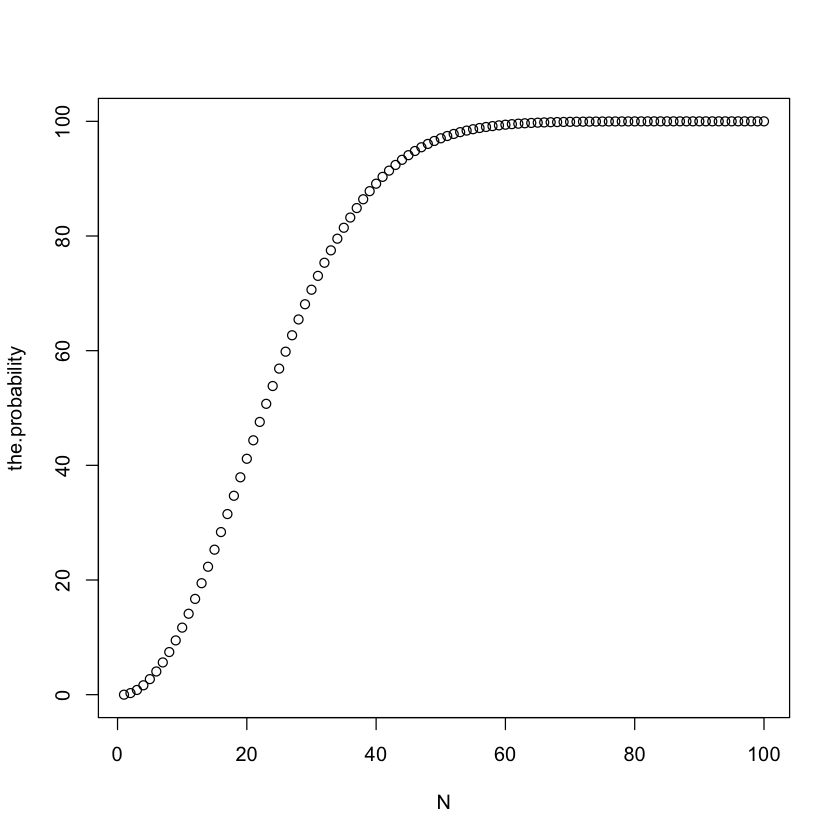

In [10]:
# Your code here

N = 1:100
the.probability = rep(0,100)

for(i in 1:100)
{
   # Your code here
   
   the.probability[i] = calc.birthday.prob(i) # Replace the question mark!
}

par(bg = "#fff")  # set background color
plot(N,the.probability)

# Problem 2 

In this problem, we will use the sample generation skills from the previous problem to simulate dice rolls.

**Part a)** 

Let $X$ be a random variable for the number rolled on a fair, six-sided die. Use the sample function (See Problem 1) to simulate $100$ values of $X$.

In [36]:
# Your code here
numrolls = 100
x = sample(1:6, numrolls, replace=TRUE)

In [37]:
# Run this cell to tabulate the counts for each outcome 1 through 6
table(x)

x
 1  2  3  4  5  6 
19 16 21 14 15 15 

In [38]:
# Run this cell to get the proportions
table(x) / numrolls

x
   1    2    3    4    5    6 
0.19 0.16 0.21 0.14 0.15 0.15 

Do you see what you expected to see? Run the previous three cells again with different values of "numrolls" to get more accurate results.

**Part b)** 

Consider rolling <u>two</u> fair six-sided dice. What is the probability that the sum of the results is greater than or equal to 5? Work out the exact result by hand and then run a simulation to answer the question in the next cell. Compare your answers-- check your analytical solution and code until you can get them to match! 

In [39]:
# Your code here
less.then.5 = length(c(11,12,13,21,22,31))
total = 6^2
prob.gt.5 = (1 - (less.then.5 / total)) * 100
prob.gt.5

[1] 83.33333

In [42]:
numrolls = 500
dice1 = sample(1:6, numrolls, replace=TRUE)
dice2 = sample(1:6, numrolls, replace=TRUE)
successes = 0
for (i in 1:500) {
    successes = successes + ifelse(dice1[i] + dice2[i] >= 5, 1, 0)
}
result = successes / numrolls * 100
result

[1] 84.2